In [43]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [11]:
import numpy as np
from statistics import mode

In [12]:
population = np.random.randint(10,20, 50)

In [13]:
np.mean(population)

14.46

In [14]:
np.median(population)

14.5

In [16]:
mode(population)

16

In [24]:
sample1  = np.random.choice(population, 20)

In [25]:
np.mean(sample1)

14.2

In [26]:
np.median(sample1)

14.5

In [27]:
mode(sample1)

12

In [30]:
sample1  = np.random.choice(population, 20)
sample2  = np.random.choice(population, 20)
sample3  = np.random.choice(population, 20)
sample4  = np.random.choice(population, 20)

In [33]:
mean_of_samples = []
all_sample = [sample1, sample2, sample3, sample4]
for sample in all_sample:
    mean_of_samples.append(np.mean(sample))

In [34]:
mean_of_samples

[14.55, 14.85, 15.2, 14.05]

# Cental Limit Theorem

In [37]:
pop_bnd = np.random.binomial(10, 0.5, 10000)

In [124]:
sample1  = np.random.choice(pop_bnd, 20)
sample2  = np.random.choice(pop_bnd, 20)
sample3  = np.random.choice(pop_bnd, 20)
sample4  = np.random.choice(pop_bnd, 20)

In [125]:
mean_of_samples = []
all_sample = [sample1, sample2, sample3, sample4]
for sample in all_sample:
    mean_of_samples.append(np.mean(sample))

In [126]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

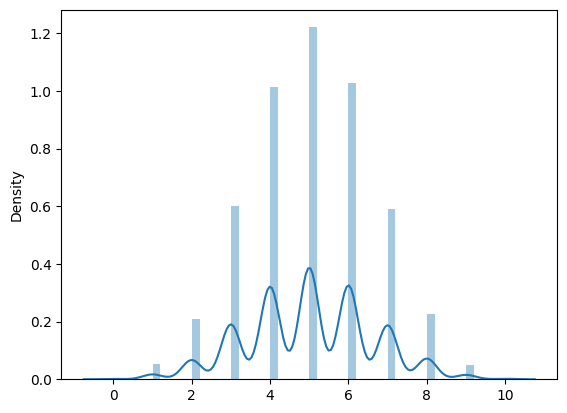

In [127]:
sns.distplot(pop_bnd)

#Binomial distribution

In [128]:
size = int(len(pop_bnd)*0.3)

In [129]:
sample_mean = []
for i in range(1,31):
    sample = np.random.choice(pop_bnd, size= size)
    sample_mean.append(np.mean(sample))

In [130]:
print(sample_mean)
len(sample_mean)

[5.012, 4.979333333333333, 4.9783333333333335, 5.037, 4.993333333333333, 4.992, 4.967666666666666, 5.023333333333333, 5.061333333333334, 4.924, 5.001, 4.996666666666667, 5.019333333333333, 4.971333333333333, 5.008, 5.030333333333333, 5.016, 5.053333333333334, 4.980333333333333, 5.061, 4.985666666666667, 4.980666666666667, 5.0216666666666665, 5.04, 5.001, 5.030333333333333, 4.992333333333334, 5.039666666666666, 4.996333333333333, 4.943]


30

<AxesSubplot:ylabel='Density'>

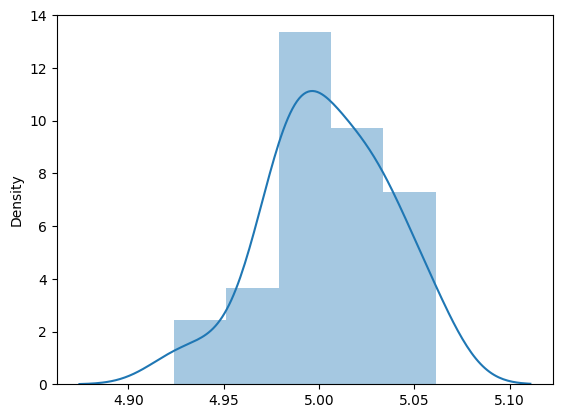

In [131]:
sns.distplot(sample_mean)

#here is the Normal Distribution

In [132]:
print(f'Mean: ', round(np.mean(sample_mean),3))
print(f'Median: ', round(np.median(sample_mean),3))
print(f'Mode: ', mode(sample_mean))

#hence proved in Normal distribution mean = median = mode

Mean:  5.005
Median:  5.001
Mode:  5.001


In [133]:
sample_mean = []
for i in range(1,1000):
    sample = np.random.choice(pop_bnd, size= size)
    sample_mean.append(np.mean(sample))

<AxesSubplot:ylabel='Count'>

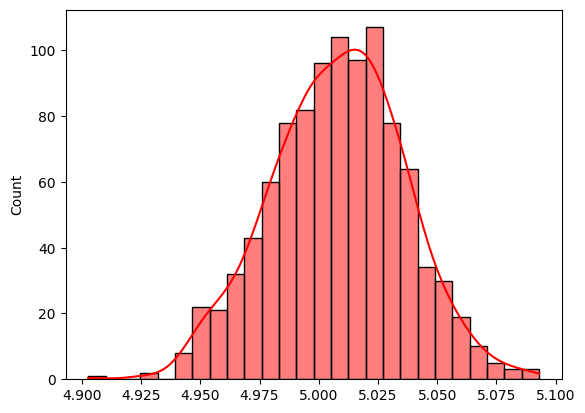

In [134]:
sns.histplot(sample_mean, kde = True, color = "r")

<AxesSubplot:ylabel='Density'>

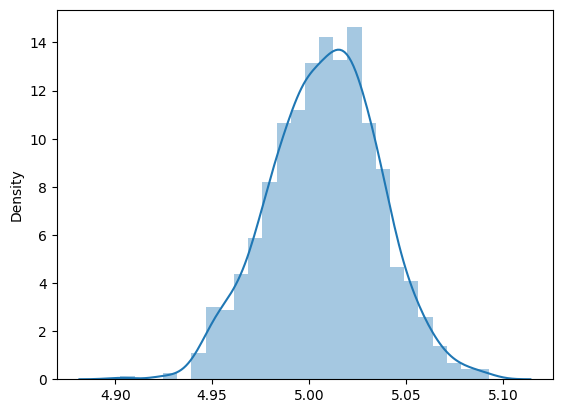

In [135]:
sns.distplot(sample_mean)

train-test split ---> random sampling

In [136]:
print(f'Mean: ', round(np.mean(sample_mean),3))
print(f'Median: ', round(np.median(sample_mean),3))
print(f'Mode: ', mode(sample_mean))

#hence proved in Normal distribution mean = median = mode

Mean:  5.008
Median:  5.009
Mode:  5.022333333333333


# Confidence Interval and Marginal Error

In [137]:
import scipy.stats as stats

In [138]:
stats.norm.ppf(q =0.99) #probablity density function = ppf
#area under curve = 

2.3263478740408408

In [139]:
z_critical = stats.norm.ppf(q =0.975)
z_critical

1.959963984540054

In [140]:
t_critical = stats.t.ppf(q=0.975, df = 24)
t_critical

2.0638985616280205

In [141]:
margin_of_error = z_critical * (np.std(sample_mean)/np.sqrt(20))
margin_of_error

0.01228263831057093

In [145]:
UL  = round(np.mean(mean_of_samples) + margin_of_error, 2)
LL  = round(np.mean(mean_of_samples) - margin_of_error,2)


In [146]:
 R = print(UL, LL)

4.94 4.91


In [147]:
type(R)

NoneType

# Z-test

In [223]:
from numpy.random import randn
population = randn(10000)

In [224]:
population

array([-0.18318562, -0.12891615, -1.0887109 , ..., -1.22620058,
        1.07922323, -0.1940879 ])

In [225]:
print(f'Mean: ',np.mean(population), f'Std: ', np.std(population))

Mean:  0.0032575611984018535 Std:  1.0012971357158416


In [226]:
aplha = 0.5

<AxesSubplot:ylabel='Density'>

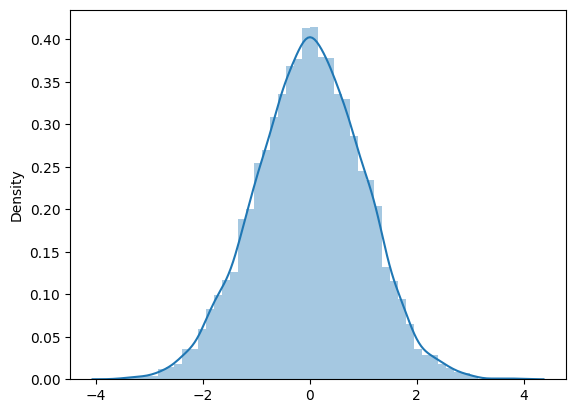

In [227]:
sns.distplot(population)

In [228]:
from statsmodels.stats.weightstats import ztest

In [229]:
z_score, p_value = ztest(population, value = np.mean(population), alternative= "larger") #larger--> two tailed test

In [230]:
p_value 

0.5

In [231]:
if p_value < alpha:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is not rejected")

Null hypothesis is not rejected
